<a href="https://colab.research.google.com/github/ge35tay/Event_Based_Vision_EX2/blob/main/%5BSkeleton%5D_Lecture_3_gaussian_decision_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import packages - numpy, matplotlib, sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

## TODO : Generate dataset of three classes.
### Definitions.
- X : data points, 2-dimensional vector. 
- y : Label, 0 or 1 or 2
- data1, data2, data3 : data points for each class. These consist X.
- label1, label2, label3 : labels for each class. These consist y.
- mu@, cov@ : mean and covariance for @-th class data points. 

### What you need to implement.
- define mu@ (2-dim) and cov@ (2 x 2 dim) first
- Try to use "np.eye(2)" to make diagonal matrix for cov@
- use "np.random.multivariate_normal" function to generate "num_data" data points for three classes "data1 - data3"
- define "label1 - label3". For example, label1 would be "num_data"-dimensional vector which all values are 0. 
- Check the visualization of data by changing PLOT_DATA into True.
- Example of dataset (mu1 = [1, 1], mu2 = [5, 3], mu3 = [6, 0])
- 
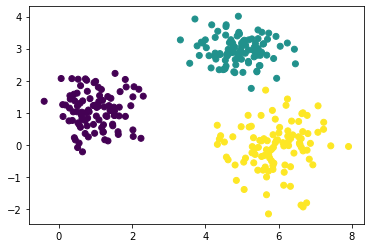

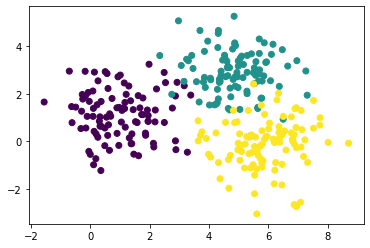

In [3]:
# fix the random seed
np.random.seed(0)

num_data = 100 

# definition of means of each class
mu1 = [1,1]
mu2 = [5,3]
mu3 = [6,0]

# definition of covariances of each class. Try to define diagonal matrices using np.eye(2).
cov1 = np.eye(2)
cov2 = np.eye(2)
cov3 = np.eye(2)

# definition of data points for each class. Try to use np.random.mutlivariate_normal function.
data1 = np.random.multivariate_normal(mu1, cov1, num_data)
data2 = np.random.multivariate_normal(mu2, cov2, num_data)
data3 = np.random.multivariate_normal(mu3, cov3, num_data)

# definition of labels for each class. Try to use np.zeros and np.ones.
label1 = np.zeros(num_data)
label2 = np.ones(num_data)
label3 = 2*np.ones(num_data)

# concatenate data1 - data3 into X. and label1 - label 3 to y. Try to use np.concatenate to concat.
X = np.concatenate((data1, data2, data3))
y = np.concatenate((label1, label2, label3))

PLOT_DATA = True
if PLOT_DATA:
    plt.scatter(X[:, 0], X[:, 1], c=y)

## TODO : fit Gaussian Mixture Model to data points.
- use GaussianMixture function, that has been imported at the first cell.
- Read [https://scikit-learn.org/stable/modules/mixture.html] for more info.

In [4]:
# Fit the Gaussian Mixture Model. Note that there are three classes. 
# Try to use GaussianMxture function, that has been imported at the first cell.
clf = GaussianMixture(n_components=3, covariance_type='diag')
clf.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

## TODO : predict the classification probablities on a grid

### Definitions
- xlim : range of x-axis for a grid
- ylim : range of y-axis for a grid
- xx, yy : grid points in the range of xlim and ylim. (num_grid) X (num_grid) size.
- Z : classification probability of all points consisting the grid. (num_grid**2) X (3) size.
- Z1, Z2, Z3 : classification probability for class 1, 2, 3. (num_grid) X (num_grid) size.

### What you need to implement
- Define xlim and ylim by using Tuple. i.e., xlim = (1, 2)
- Define xx and yy based on **np.meshgrid** and **np.linspace** function. xx and yy needs to be size of (num_grid) X (num_grid).
- Flatten the xx and yy with **xx.ravel()** and **yy.ravel()**
- Stack the xx and yy with **np.column_stack**
- Use **clf.predict_proba** in order to predict the classification probability Z for each point consisting a grid. 
- Define Z1, Z2, Z3 from Z. Use **.reshape** function to resize Z1, Z2, Z3 into (num_grid) X (num_grid) size, so that size of Z1-Z3 can be same as xx and yy.

In [35]:
# predict the classification probabilities on a grid
num_grid = 201

# Define xlim and ylim
xlim = (-1,8)
ylim = (-1,5)

# define xx and yy by using np.meshgrid and np.linspace. For more info, read official documentation.
xx, yy = np.meshgrid(np.linspace(xlim[0],xlim[1], num_grid), np.linspace(ylim[0], ylim[1], num_grid))
# obtain Z from clf.predict_proba function. For the input, stack xx.ravel() and yy.ravel() with np.column_stack
# Z would N by 3 matrix, which i-th row defines the classification probability for i-th grid point.
Z = clf.predict_proba(np.column_stack((xx.ravel(), yy.ravel())))


# obtain Z1, Z2, Z3. use .reshape function to resize them like xx and yy.
Z1 = Z[:,0].reshape((num_grid,num_grid))
Z2 = Z[:,1].reshape((num_grid,num_grid))
Z3 = Z[:,2].reshape((num_grid,num_grid))

(201, 201)


## TODO : visualization
- Use matplotlib package to plot the result. 
- First, use **ax.scatter** function to plot data points X.
- Then, plot the boundary of each class by using **ax.contour** function. 
- Here, plot the boundary where the probability of being each class is "0.5". 
- Example visualization
- 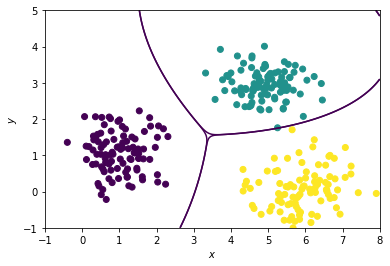

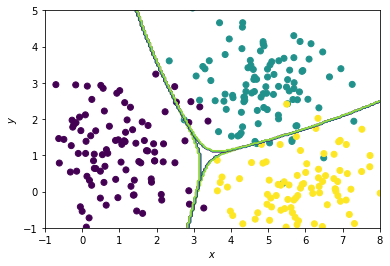

In [51]:
# Plot the results

# define fig and ax
fig, ax = plt.subplots(1, 1)

# plot the data points
ax.scatter(X[:, 0], X[:, 1], c=y)

# draw the boundary
ax.contour(xx, yy, Z1>0.5)
ax.contour(xx, yy, Z2>0.5)
ax.contour(xx, yy, Z3>0.5)

# set range of x and y axis
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# draw label
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# plot the result
plt.show()